In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
dataset = mnist.load_data()

Загрузили mnist, теперь составим на его основе point clouds одного размера (n x 2) для каждого примера из выборки. Таким образом, создадим один большой датасет, который в дальнейшем будем использовать для исследования.

In [3]:
train, test = dataset
X_train, y_train = train
X_test, y_test = test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X = np.vstack((X_train, X_test))
y = np.vstack((y_train.reshape(-1, 1), y_test.reshape(-1, 1)))

X.shape, y.shape

((70000, 28, 28), (70000, 1))

In [5]:
import matplotlib.pyplot as plt

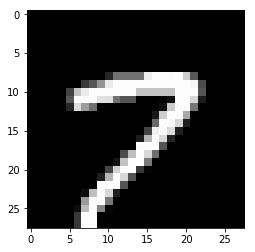

[7]


In [6]:
plt.imshow(X[123], cmap="gray")
plt.show()
print(y[123])

In [7]:
from scipy.stats import bernoulli as coin_flip

In [8]:
points = []

for i in range(28):
    for j in range(28):
        
        if coin_flip.rvs(X_train[123][i][j] / 255) == 1:
            points.append([j / 28, (-i + 28) / 28])

points = np.array(points)

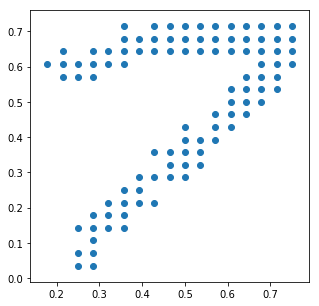

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [10]:
from tqdm import tqdm_notebook as tqdm

In [11]:
def make_2d_mnist(X, y):
    n_obs = X.shape[0]
    w, h = X.shape[2], X.shape[1]
    
    sample = []
    
    for i in tqdm(range(n_obs)):
        points = []

        for j in range(h):
            for k in range(w):
        
                if X[i][j][k] > 0:
                    points.append([k / w, (-j + h) / h])

        points = np.array(points)
        sample.append(points)
        
    return sample, y

In [12]:
sample, labels = make_2d_mnist(X, y)

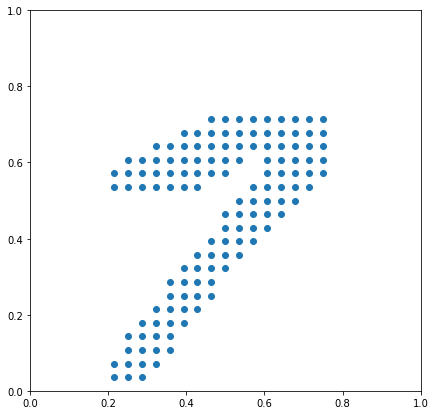

[7]


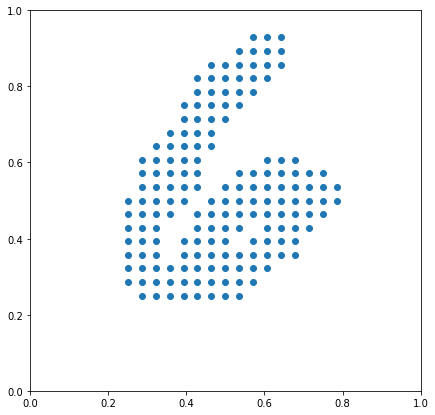

[6]


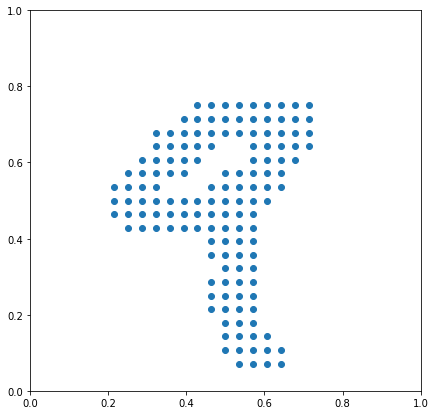

[9]


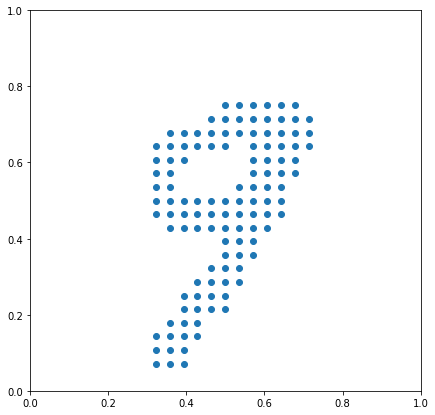

[9]


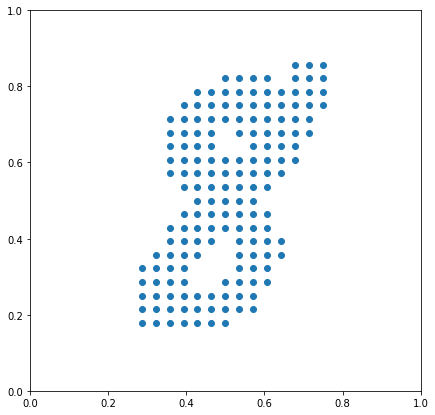

[8]


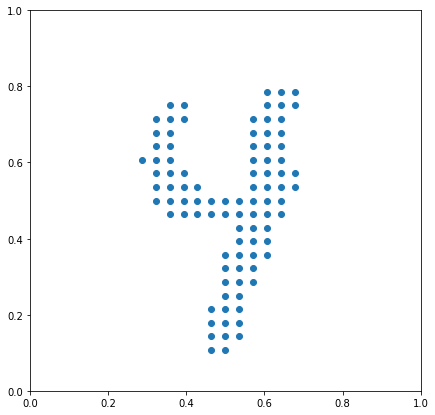

[4]


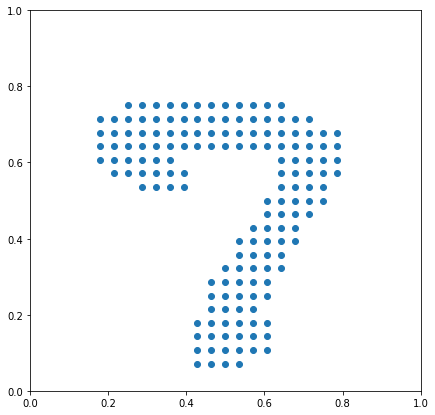

[7]


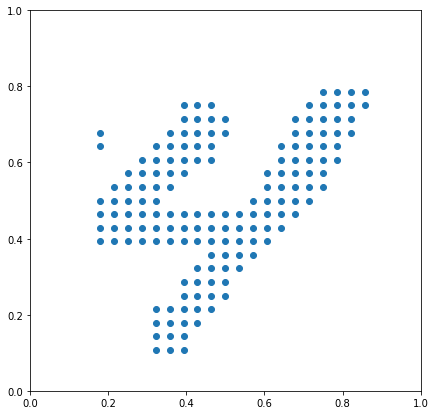

[4]


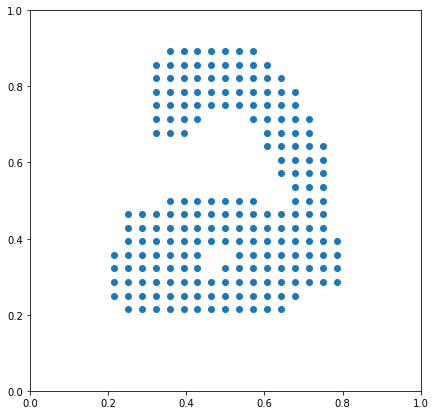

[2]


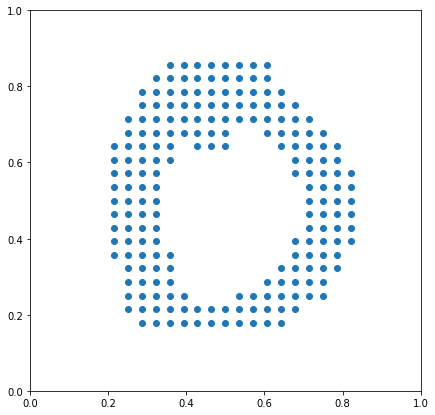

[0]


In [13]:
ix = np.random.choice(100, size=10, replace=False)
  
for i in ix:
    plt.figure(figsize=(7, 7))
    plt.scatter(sample[i][:, 0], sample[i][:, 1])
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()
    print(labels[i])

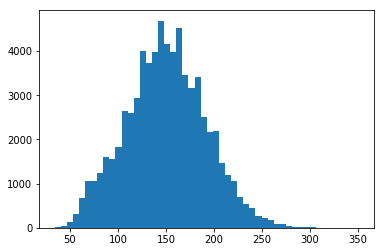

Min is 34, max is 351


In [14]:
sizes = [len(elem) for elem in sample]

plt.hist(sizes, bins=50)
plt.show()

print("Min is " + str(min(sizes)) + ", max is " + str(max(sizes)))

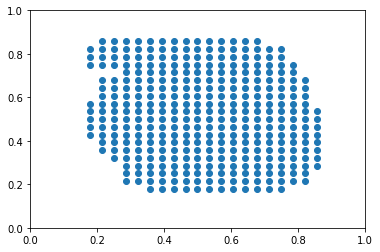

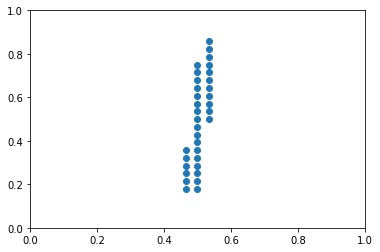

In [ ]:
for elem in sample:
    if len(elem) == 34:
        plt.scatter(elem[:, 0], elem[:, 1])
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.show()
        
    if len(elem) == 351:
        plt.scatter(elem[:, 0], elem[:, 1])
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.show()

Видим, что некоторые примеры из выборки содержат малое количество точек, а некоторые большое количество точек. Добьём размеры всех примеров до 400 точек путём семплирования точек из примера с добавлением случайных маленьких сдвигов и перемешаем все точки.

In [ ]:
for i, example in enumerate(sample):
    to_add = 400 - len(example)
    
    ix = np.random.choice(range(len(example)), size=to_add, replace=True)
    new_points = example[ix] + np.random.randn(*example[ix].shape) * 0.01
    sample[i] = np.vstack((example, new_points))
    np.random.shuffle(sample[i])

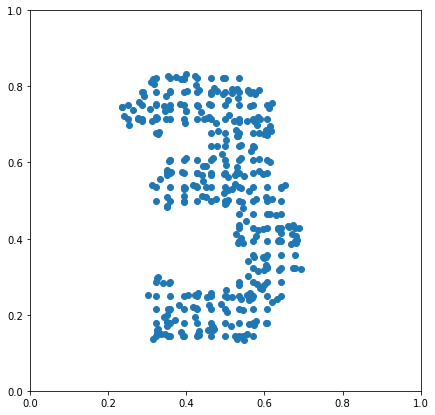

[3]


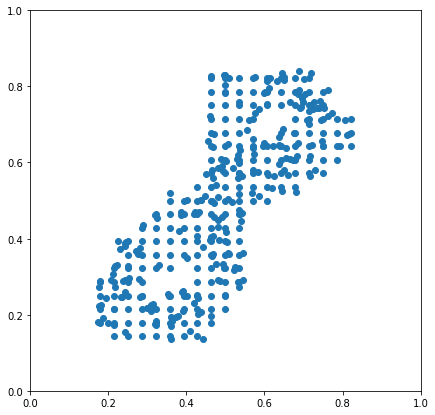

[8]


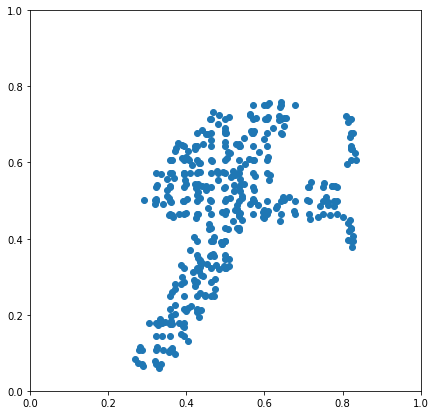

[4]


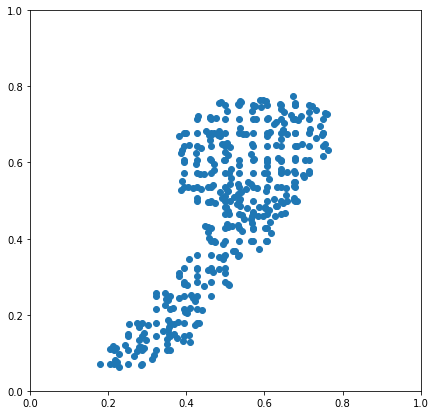

[9]


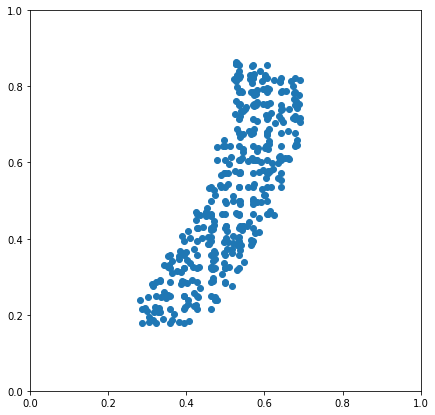

[1]


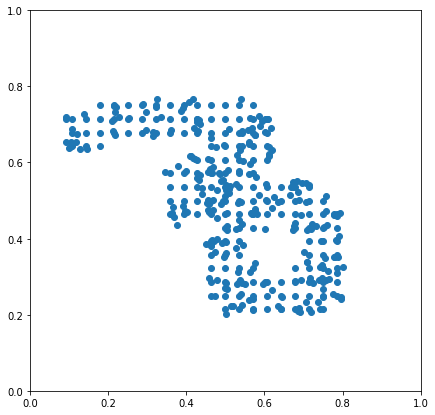

[3]


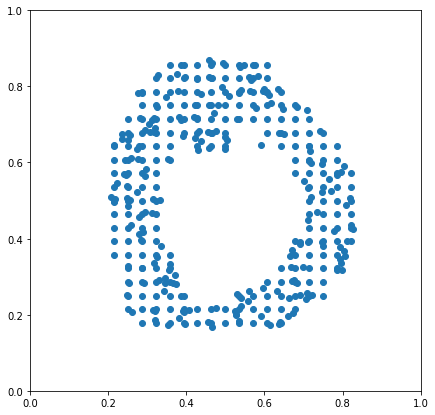

[0]


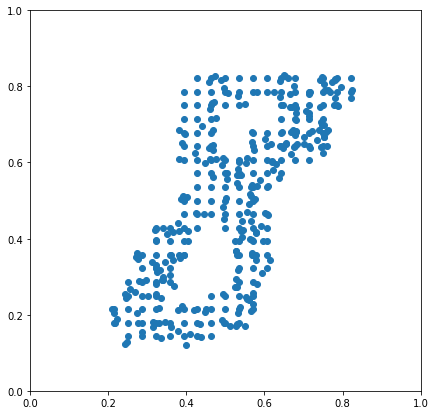

[8]


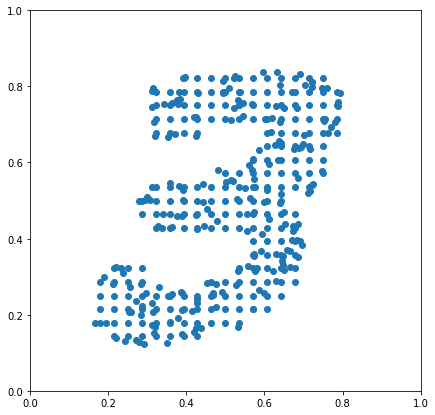

[3]


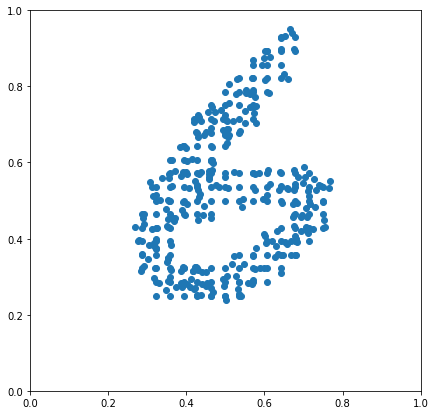

[6]


In [ ]:
ix = np.random.choice(100, size=10, replace=False)
  
for i in ix:
    plt.figure(figsize=(7, 7))
    plt.scatter(sample[i][:, 0], sample[i][:, 1])
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()
    print(labels[i])

Поскольку все примеры приведены к одному размеру, можно обернуть их в один np.array, который сложим на диск.

In [ ]:
sample = np.array(sample)

In [ ]:
sample.shape, labels.shape

((70000, 400, 2), (70000, 1))

In [ ]:
np.save("mnist2d-points", sample)
np.save("mnist2d-labels", labels)

Доступ к файлам по ссылке: https://www.dropbox.com/s/lgle4il1kobfmb5/mnist2d.zip?dl=0. К сожалению, GitHub не позволяет загружать файлы > 100 Mb.